# Essential Libraries

In [47]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set()  

In [48]:
threeVars = pd.read_pickle('threeVars.pickle')
threeVarsNum = pd.read_pickle('threeVarsNum.pickle')

------

# LinearRegression

We will be using Linear Regression as our first Machine Learning model to find out which factor out of the 3 factors (brand, processor_brand, ram_memory) is the most influential factor affecting price.

Linear regression is a fundamental supervised learning algorithm used for predictive modeling and understanding the relationship between variables in a dataset. It is used for analyzing and interpreting data, especially when there's a linear relationship between the input features and the target variable. Linear regression works by fitting a straight line to the data points, minimizing the vertical distances between the observed and predicted values. 

Let's import the essential libraries.

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

We will be using random_state = 57 to keep our results the same no matter how many times we run it. We will also create dataframes for each of the 3 factors and price to prepare for our Linear Regression.

In [96]:
random_state = 57
RAM = pd.DataFrame(threeVars['ram_memory'])
PR = pd.DataFrame(threeVars['Price'])
BR = pd.DataFrame(threeVars['brand'])
PB = pd.DataFrame(threeVars['processor_brand'])

# Create a Linear Regression object
linreg = LinearRegression()
PR_train, PR_test, RAM_train, RAM_test = train_test_split(PR, RAM, test_size = 0.25, random_state = random_state) 
PR_train, PR_test, BR_train, BR_test = train_test_split(PR, BR, test_size = 0.25, random_state = random_state) 
PR_train, PR_test, PB_train, PB_test = train_test_split(PR, PB, test_size = 0.25, random_state = random_state) 

<Axes: >

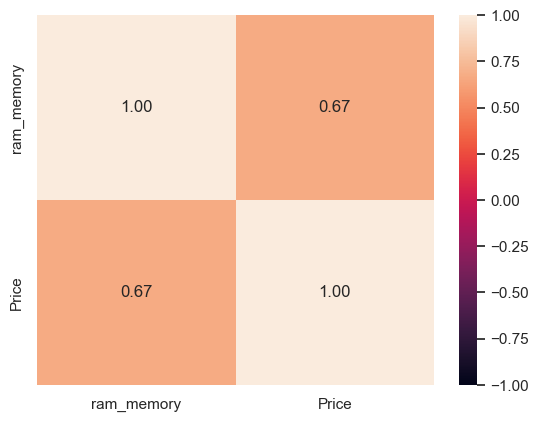

In [97]:
trainDF = pd.concat([RAM_train, PR_train], axis = 1).reindex(PR.index)
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

From this heatmap, we can see that there is a **correlation of 0.67 between ram_memory and Price here**.

We will now find the mean prices of each category of ram_memory and plot a barplot below.

In [106]:
mean_prices_by_RAM = threeVars.groupby(threeVars['ram_memory'])['Price'].mean()
print(f"Mean Prices by RAM:\n{mean_prices_by_RAM}")

Mean Prices by RAM:
ram_memory
4      71906.411765
8      50592.180628
12     53990.000000
16     88240.596078
32    240932.000000
36    319900.000000
Name: Price, dtype: float64


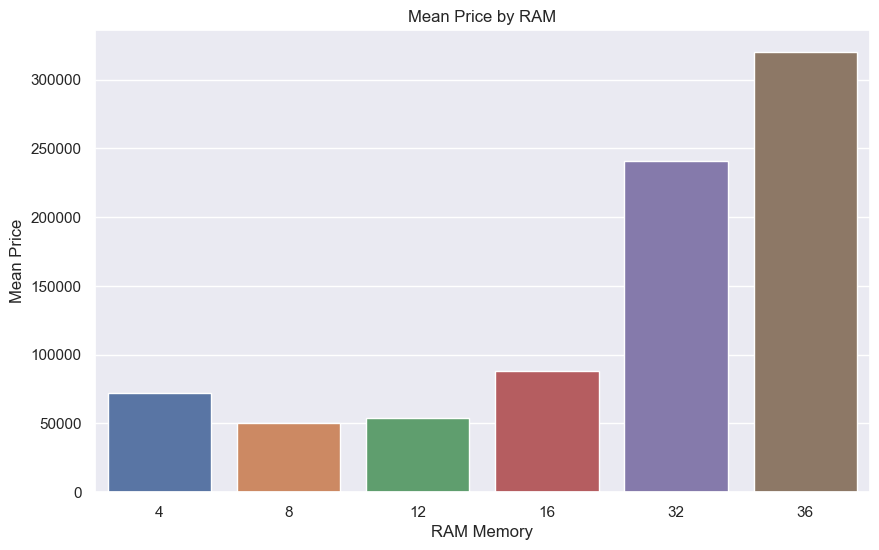

In [107]:
plt.figure(figsize=(10, 6))
sb.barplot(x=mean_prices_by_RAM.index, y=mean_prices_by_RAM.values)
plt.title('Mean Price by RAM')
plt.xlabel('RAM Memory')
plt.ylabel('Mean Price')
plt.show()

Here we fit the RAM_train and PR_Train data to the Linear Regression Model and plot the Regression Line.

In [100]:
linreg.fit(RAM_train, PR_train)

LinearRegression()

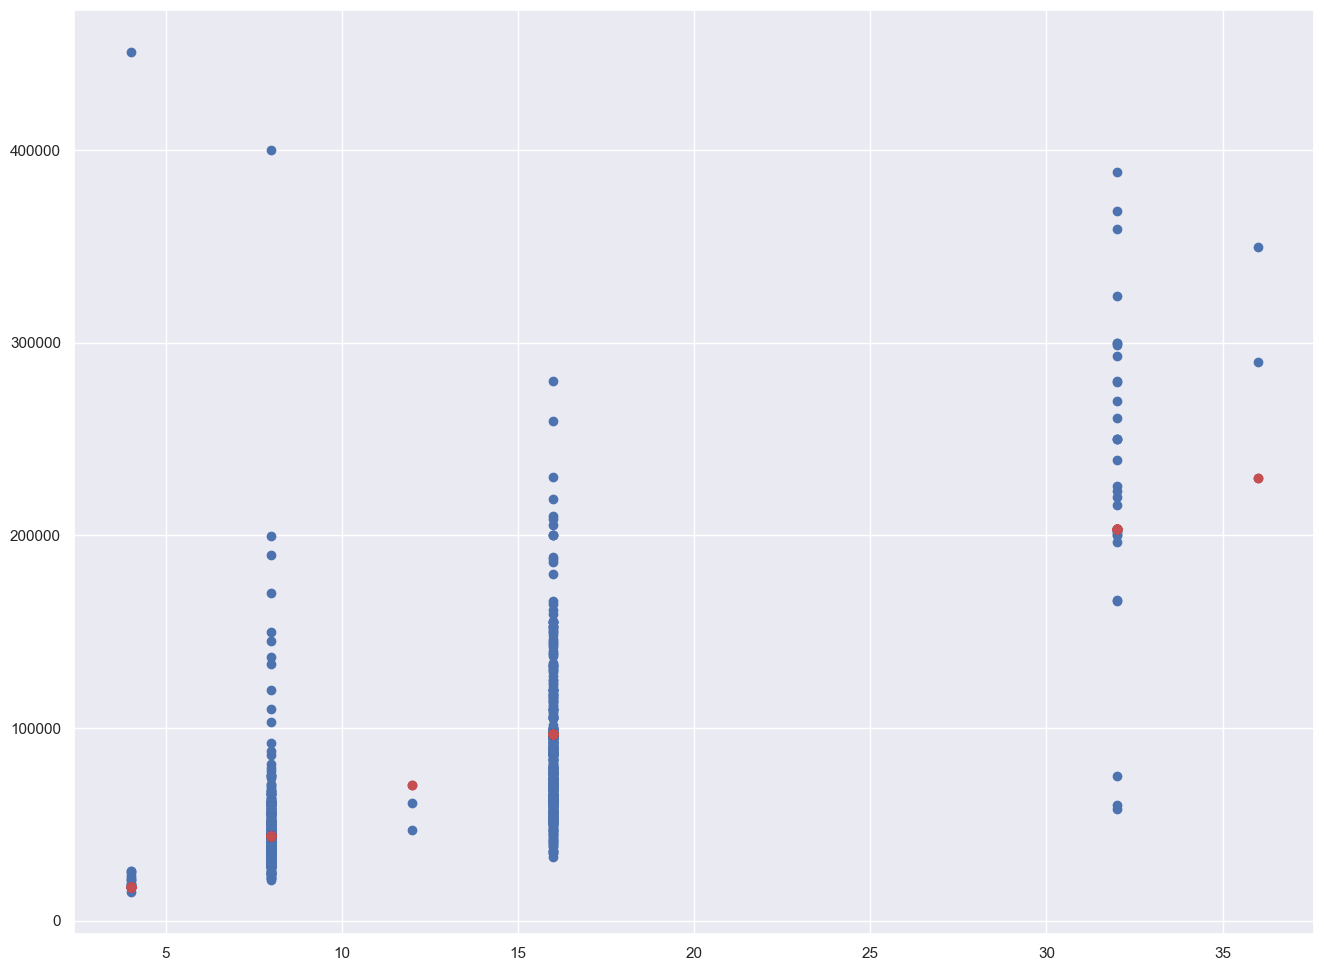

In [101]:
# Predict saleprice values corresponding to GLA Train
total_train_pred = linreg.predict(RAM_train)

# Plot the Linear Regression line
f = plt.figure(figsize=(16, 12))
plt.scatter(RAM_train, PR_train)
plt.scatter(RAM_train, total_train_pred, color = "r")
plt.show()

We will now find metrics that will help us determine the accuracy of our regression line and also see how correlated ram_memory is to price.

In [102]:
# Explained Variance (R^2)
print("Explained Variance (R^2) \t:", linreg.score(RAM_train, PR_train))

# Mean Squared Error (MSE)
def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))


mse = mean_sq_err(RAM_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Explained Variance (R^2) 	: 0.44534247002901983
Mean Squared Error (MSE) 	: 7614296802.413497
Root Mean Squared Error (RMSE) 	: 87259.93812978266


# [fill in a comment here]

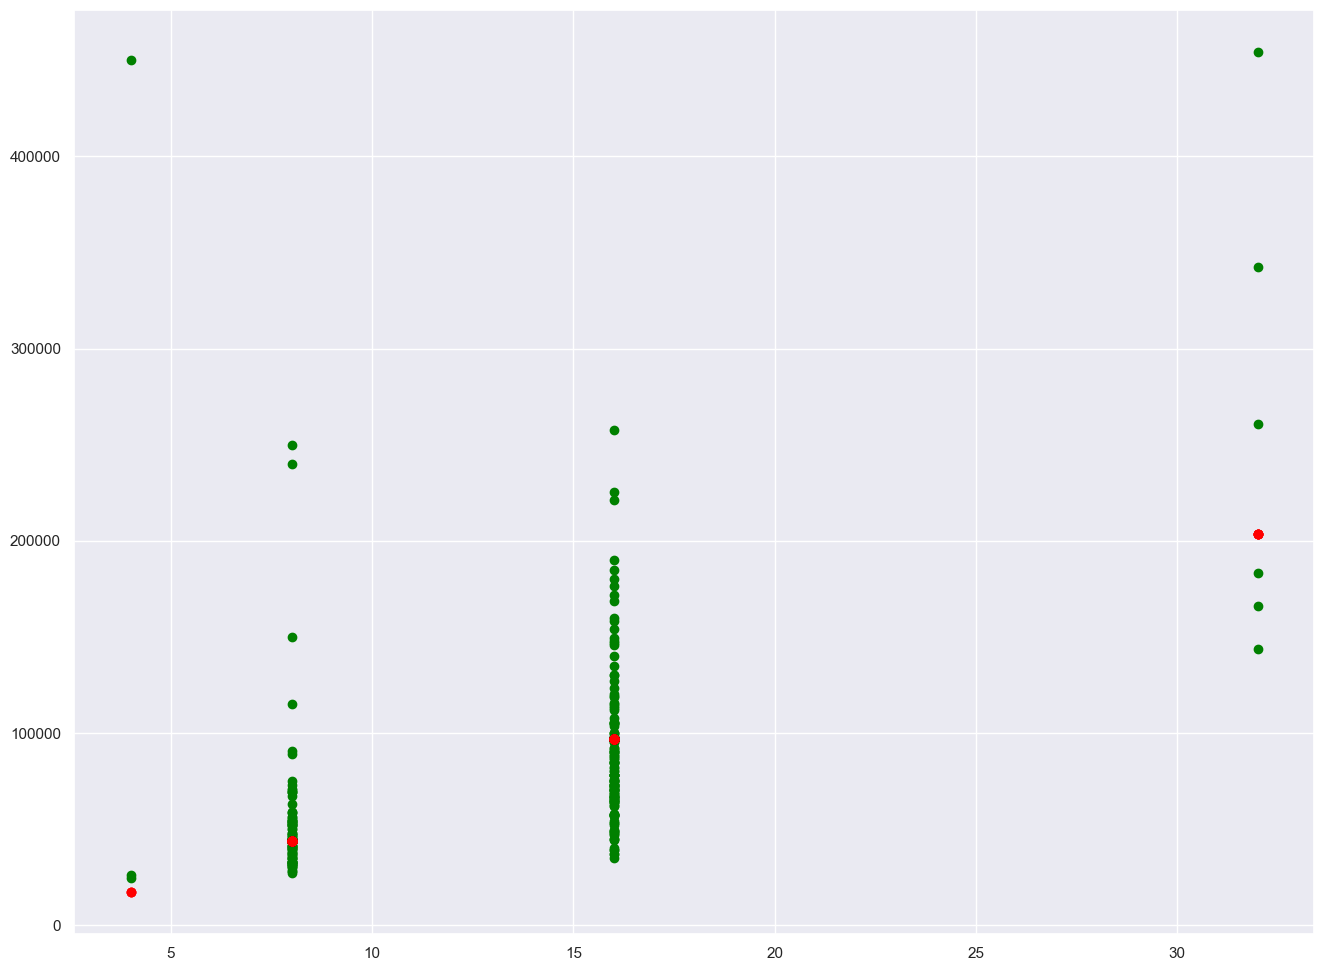

In [103]:
total_test_pred = linreg.predict(RAM_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 12))
plt.scatter(RAM_test, PR_test, color = "green")
plt.scatter(RAM_test, total_test_pred, color = "red")
plt.show()

We realise that it is improbable to plot heatmaps for all variables to find the correlation between categorical variables and the price of laptops even when the categorical variables are encoded. Hence, we explored for more methods to find correlations between categorical variables and price, and decided to go ahead with 

1. grouping the brand and processor_brand variables  based on their different brands, and
  
2. calculate the mean price for each group of data. We then perform the ANOVA test to see if there is a statistically significant difference in mean prices between different brands.

In [104]:
from scipy.stats import f_oneway, kruskal

In [105]:
mean_prices_by_brand = threeVars.groupby(threeVars['brand'])['Price'].mean()
print(f"Mean Prices by Brand:\n{mean_prices_by_brand}")

Mean Prices by Brand:
brand
acer          62847.876404
apple        193875.333333
asus          78290.223810
dell         101701.132075
hp            76184.303922
infinix       38220.769231
lenovo        65527.562189
lg           115284.714286
msi           94260.433333
samsung       67990.000000
zebronics     39132.857143
Name: Price, dtype: float64


In [78]:
mean_prices_by_processorBrand = threeVars.groupby('processor_brand')['Price'].mean()
threeVars = threeVars[~threeVars['processor_brand'].str.contains(r'\bother\b', case=False, regex=True)]
print(f"Mean Prices by  Processor Brand:\n{mean_prices_by_processorBrand}")

Mean Prices by  Processor Brand:
processor_brand
amd       65302.353612
apple    193875.333333
intel     81803.292101
Name: Price, dtype: float64


In [79]:
brand_groups = [group['Price'].values for name, group in threeVars.groupby('brand')]
anova_result = f_oneway(*brand_groups)
print(f"\nANOVA test result (p-value): {anova_result.pvalue}")


ANOVA test result (p-value): 5.496321079292126e-21


In [80]:
processorBrand_groups = [group['Price'].values for name, group in threeVars.groupby('processor_brand')]
anova_result = f_oneway(*processorBrand_groups)
print(f"\nANOVA test result (p-value): {anova_result.pvalue}")


ANOVA test result (p-value): 7.995496737805278e-18


#### A p-value of less than 0.05 would mean that we can reject the null hypothesis (of that there are no significant differences in the prices of the brands).  The p-values of the brand_group (5.496321079292126e-21) and of the processorBrand_group (7.995496737805278e-18) are extremely small, much lesser than 0.05. This shows that we can confidently conclude that there is a difference in mean prices due to the different brands and processor brands within each group respectively.


#### We then plot bar graphs to see the visual representation of mean prices by brands and processor brands. We can clearly see that the mean price differs greatly based on the different brands and processor brands.

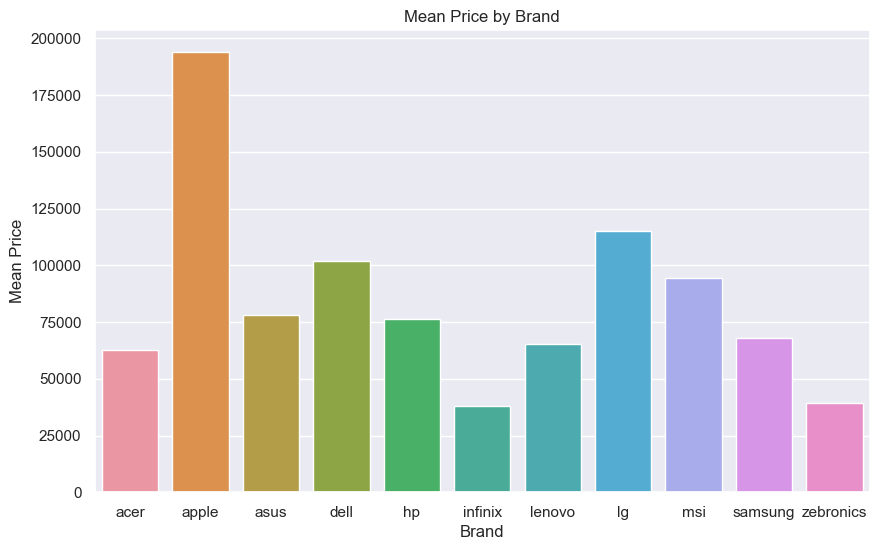

In [81]:
plt.figure(figsize=(10, 6))
sb.barplot(x=mean_prices_by_brand.index, y=mean_prices_by_brand.values)
plt.title('Mean Price by Brand')
plt.xlabel('Brand')
plt.ylabel('Mean Price')
plt.show()

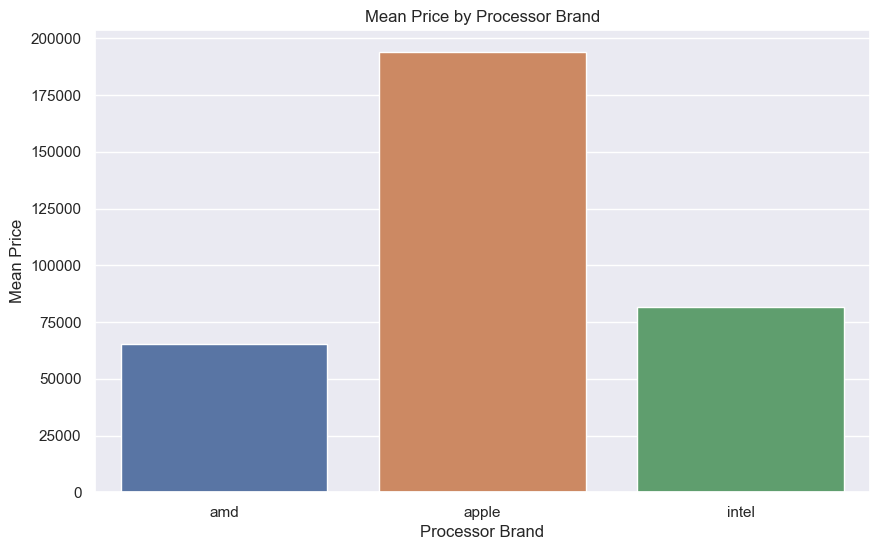

In [82]:
plt.figure(figsize=(10, 6))
sb.barplot(x=mean_prices_by_processorBrand.index, y=mean_prices_by_processorBrand.values)
plt.title('Mean Price by Processor Brand')
plt.xlabel('Processor Brand')
plt.ylabel('Mean Price')
plt.show()

#### Difference in percentage of mean prices:
#### Brands:
**Apple (mean price  = 193875.33) is 68.2% higher than the second-priciest brand (LG, mean price of 115284.71)**

#### Processor Brands:
**Apple (mean price = 193875.33) is 137% higher than the second-priciest processor brand (Intel, 81803.29)**


#### We can clearly see how different brand and processor brands lead to different mean prices.

# [We still do not have enough data to decide confidently which is the most influential factor affecting prices. Hence, we decide to use another model, RandomForestRegressor to see if we can identify the most influential factor.]

------------------------

# RandomForestRegressor

Random Forest Regression is an ensemble learning method that builds multiple decision trees during training and outputs the average prediction of the individual trees. It's a powerful technique for regression tasks because it combines the predictions of several weak models (decision trees) to improve overall prediction accuracy and generalization. Each decision tree in the forest is trained on a random subset of the training data and a random subset of the features. This randomness helps to reduce overfitting and increase the model's robustness. 

Let's import the essential libraries.

In [117]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Now we will apply the model with Price and each of the factors affecting price. 

Furthermore, we will apply the model with Price and the whole of each factor without encoding. 

Lastly, we will also find out which particular factor affects price the most out of these 3 categories.

#### a) Brand with Price

In [120]:
# Separate features (X) and target variable (y)
X = threeVars[['brand']]
y = threeVars['Price']

# Assuming 'processor_brand', 'ram_memory', and 'brand' are categorical variables,
# you can one-hot encode them
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest model with desired parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


# Feature Importance
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importance})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(sorted_feature_importance_df)


Feature Importance:
            Feature  Importance
1       brand_apple    0.557215
3        brand_dell    0.176527
8         brand_msi    0.124514
7          brand_lg    0.029243
5     brand_infinix    0.029095
6      brand_lenovo    0.028079
2        brand_asus    0.016607
10  brand_zebronics    0.015408
4          brand_hp    0.011496
0        brand_acer    0.009779
9     brand_samsung    0.002037


By examining the feature importance scores, we can determine which laptop brands have the most significant impact on predicting the price of laptops. Higher feature importance indicates that a particular brand has a stronger influence on price variation.

From the results, we can see that **brand_apple** has the **greatest importance value**, hence, it has the **greatest impact on price among all the brands**. 

#### b) Ram_memory with Price

In [128]:
# Separate features (X) and target variable (y)
X = threeVars[['ram_memory']]
y = threeVars['Price']

# you can one-hot encode it
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest model with desired parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)

# Feature Importance
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importance})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(sorted_feature_importance_df)


Feature Importance:
      Feature  Importance
0  ram_memory         1.0


Since ram_memory is not encoded, there will only be one feature that will have 1.0 importance.

#### c) Processor_brand with Price

In [112]:
# Separate features (X) and target variable (y)
X = threeVars[['processor_brand']]
y = threeVars['Price']

# Assuming 'processor_brand', 'ram_memory', and 'brand' are categorical variables,
# you can one-hot encode them
X_encoded = pd.get_dummies(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest model with desired parameters
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_model.predict(X_test)


# Feature Importance
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importance})
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(sorted_feature_importance_df)

Feature Importance:
                 Feature  Importance
1  processor_brand_apple    0.807991
0    processor_brand_amd    0.113259
2  processor_brand_intel    0.078750


By examining the feature importance scores, we can determine which laptop brands have the most significant impact on predicting the price of laptops. 

From the results, we can see that **processor_brand_apple** has the **greatest importance value**, hence, it has the **greatest impact on price among all the brands**. 

#### d) All the three variables with Price

We will now examine the feature importance score across all variables to determine which laptop brands have the most significant impact on predicting the price of laptops.

In [129]:
# Separate features (X) and target variable (y)
x = threeVars[['ram_memory','brand','processor_brand']]  # Adjust the column name accordingly
y = threeVars['Price']  # Adjust the column name accordingly

# Assuming 'ram_memory' is a categorical variable
x_encoded = pd.get_dummies(x, columns=['ram_memory','brand','processor_brand'])

# Split the dataset into training and testing sets
pb_train, pb_test, price_train, price_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest model with desired parameters
# You can adjust parameters such as n_estimators, max_depth, etc. as per your requirement
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(pb_train, price_train)

# Predict on the test set
price_pred = rf_model.predict(pb_test)

# Feature Importance
feature_importance = rf_model.feature_importances_

# Extracting feature importances for each variable
ram_memory_importance = feature_importance[x_encoded.columns.str.startswith('ram_memory_')].sum()
brand_importance = feature_importance[x_encoded.columns.str.startswith('brand_')].sum()
processor_brand_importance = feature_importance[x_encoded.columns.str.startswith('processor_brand_')].sum()

# Comparing feature importances
print("Feature Importances:")
print("ram_memory importance:", ram_memory_importance)
print("brand importance:", brand_importance)
print("processor_brand importance:", processor_brand_importance)

Feature Importances:
ram_memory importance: 0.671097934193423
brand importance: 0.2393364860542281
processor_brand importance: 0.08956557975234908




From the results, we can see that ram_memory has the greatest importance value, hence, it has the greatest impact on price among the other variables. 

#### e) All the particular variables with price

In [14]:
# Separate features (X) and target variable (y)
x = threeVars[['ram_memory','brand','processor_brand']]  # Adjust the column name accordingly
y = threeVars['Price']  # Adjust the column name accordingly

# Assuming 'ram_memory' is a categorical variable
x_encoded = pd.get_dummies(x, columns=['ram_memory','brand','processor_brand'])

# Split the dataset into training and testing sets
pb_train, pb_test, price_train, price_test = train_test_split(x_encoded, y, test_size=0.2, random_state=42)

# Initialize Random Forest model with desired parameters
# You can adjust parameters such as n_estimators, max_depth, etc. as per your requirement
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)

# Train the model
rf_model.fit(pb_train, price_train)

# Predict on the test set
price_pred = rf_model.predict(pb_test)

# Feature Importance
feature_importance = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': x_encoded.columns, 'Importance': feature_importance})  # Use x_encoded.columns instead of X.columns
sorted_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importance:")
print(sorted_feature_importance_df)


Mean Squared Error: 1658119680.5613067
Feature Importance:
                  Feature  Importance
4           ram_memory_32    0.369458
1            ram_memory_8    0.126391
3           ram_memory_16    0.107543
18  processor_brand_apple    0.074472
7             brand_apple    0.071102
14              brand_msi    0.058053
0            ram_memory_4    0.048480
11          brand_infinix    0.045014
9              brand_dell    0.038509
5           ram_memory_36    0.018915
10               brand_hp    0.011746
17    processor_brand_amd    0.007797
19  processor_brand_intel    0.007296
13               brand_lg    0.003349
12           brand_lenovo    0.003255
6              brand_acer    0.002821
16        brand_zebronics    0.002768
8              brand_asus    0.001961
15          brand_samsung    0.000759
2           ram_memory_12    0.000312


From the above, we can see that the **top 3 features that are the most important in influencing price is from ram_memory**. So, we conclude that **ram_memory is the factor that affects price the most out of the three variables***.

------

# Clustering

Now, we will use clustering to affirm or disprove the above fact.

Firstly, We have to determine what is the optimal number of clusters we want for our model to see if ram_memory affects price significantly. We will be using Elbow method and Silhouette Score to determine this.

### Elbow Method

More Details:

https://www.analyticsvidhya.com/blog/2021/01/in-depth-intuition-of-k-means-clustering-algorithm-in-machine-learning/


The elbow method is a heuristic used to determine the optimal number of clusters (K) in a K-means clustering algorithm. It involves plotting the inertia (or within-cluster sum of squares) as a function of the number of clusters and visually inspecting the plot for the "elbow point" – the point at which the inertia starts to decrease at a slower rate. The rationale is that as K increases, inertia typically decreases, but at a certain point, adding more clusters does not significantly reduce inertia. This point is often considered the optimal number of clusters, as it strikes a balance between maximizing intra-cluster similarity and minimizing the number of clusters.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

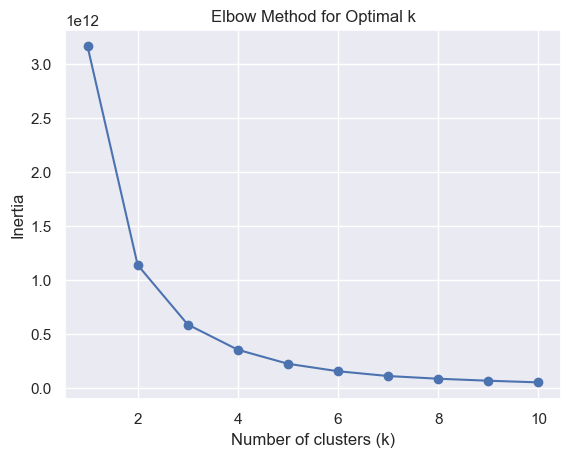

In [15]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Choose the number of clusters to consider
k_values = range(1, 11)
inertia_values = []

# Fit KMeans for different values of k and calculate inertia
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(threeVarsNum)
    inertia_values.append(kmeans.inertia_)


# Plot the Elbow Method graph
plt.plot(k_values, inertia_values, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


From this plot, we believe that the **optimal number of clusters** we should have is **2** as this is the point where the inertia starts to decrease at a slower rate, resembling an "elbow."

### Silhouette Score Method

First, it imports necessary tools like silhouette_score from sklearn.metrics. Then, it runs through a range of potential cluster numbers, from 2 to 10. For each K value, it creates a K-means model, fits it to our data, and calculates the silhouette score, which tells us how well-defined our clusters are. These scores are saved in a list. Next, the code creates a plot showing how silhouette scores change with the number of clusters. Finally, it figures out the best number of clusters by finding the highest silhouette score and adding 2 to include the starting cluster value. This helps us understand the ideal cluster setup for our dataset.

More Details:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are les

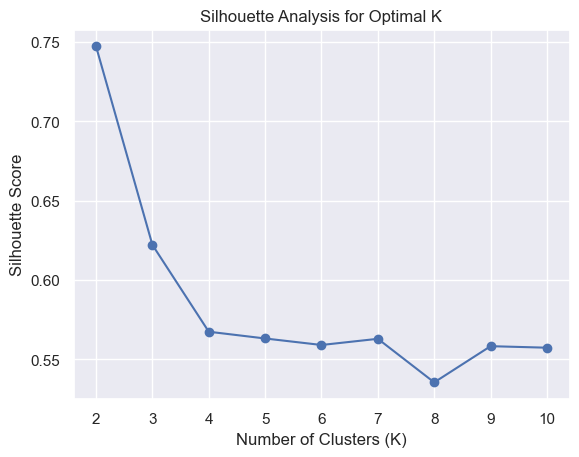

Optimal number of clusters: 2


In [16]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

for k in range(2, 11):  # Testing for cluster numbers from 2 to 10
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(threeVarsNum)
    score = silhouette_score(threeVarsNum, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal K')
plt.show()

# Finding the optimal number of clusters
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_k)


From the above two methods to determine the optimal number of clusters, we have found that both methods points to **2 being the optimal number**. So, now we will be doing our clustering algorithm with 2 clusters.

----

We are now performing K-means clustering on preprocessed data to identify underlying patterns and group similar data points together. We initialize the KMeans algorithm with 2 clusters and fit it to the preprocessed data. Then, we obtain cluster assignments for each data point. After adding the cluster assignments to the DataFrame, we visualize the relationship between Ram_memory and price, segmented by clusters. This visualization helps us understand how price varies across different clusters based on the ram memory.

In [17]:
from sklearn.cluster import KMeans

# Initialize KMeans with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)

# Fit KMeans to the preprocessed data
kmeans.fit(threeVarsNum)

# Obtain cluster assignments for each data point
cluster_assignments = kmeans.labels_

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


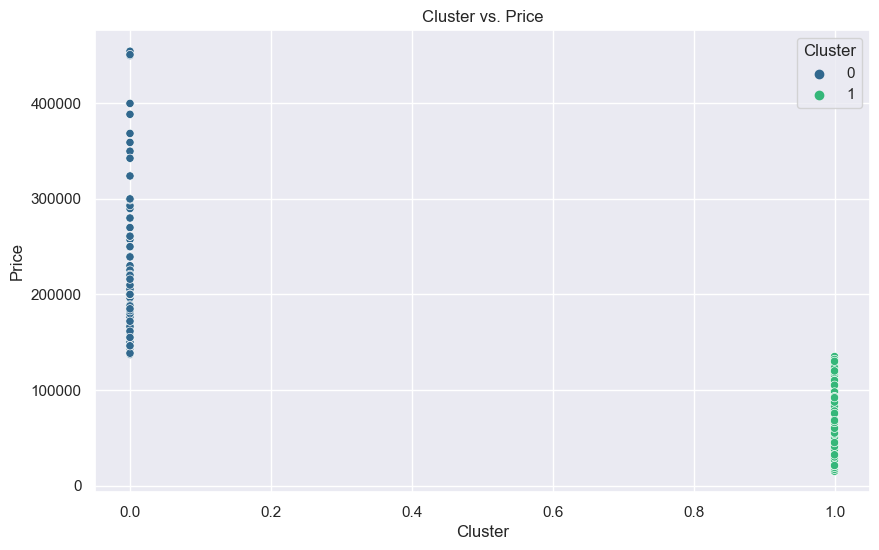

1    845
0    105
Name: Cluster, dtype: int64


In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize processor brand vs. price grouped by cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(data=threeVarsNum, x='Cluster', y='Price', hue='Cluster', palette='viridis')
plt.title('Cluster vs. Price')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.legend(title='Cluster')
plt.show()

cluster_counts = threeVarsNum['Cluster'].value_counts()
print(cluster_counts)


From our observation above, we can mainly see that the clustering algorithm separated the points mainly by price, with cluster 0 consisting of higher priced laptops and cluster 1 consisting of lower price laptops. There are **845 data points in cluster 1 and 105 points in cluster 0**. Let's now also check if the clusters are well-separated with Silhouette score.


**How Silhouette score works**

- The silhouette score ranges from -1 to 1.
- 
A score close to 1 indicates that the clusters are well-separated
-  A score close to 0 indicates overlapping clusters.
-  A negative score suggests that data points may have been assigned to the wrong cluster.

In [21]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(threeVarsNum, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7471661509526882



We observe that the Silhouette score is 0.74 which is close to 1 and the clusters are well-separated.

------

Let's now dive into using clustering algorithm to analyse if there is a strong relationship between ram_memory and price.

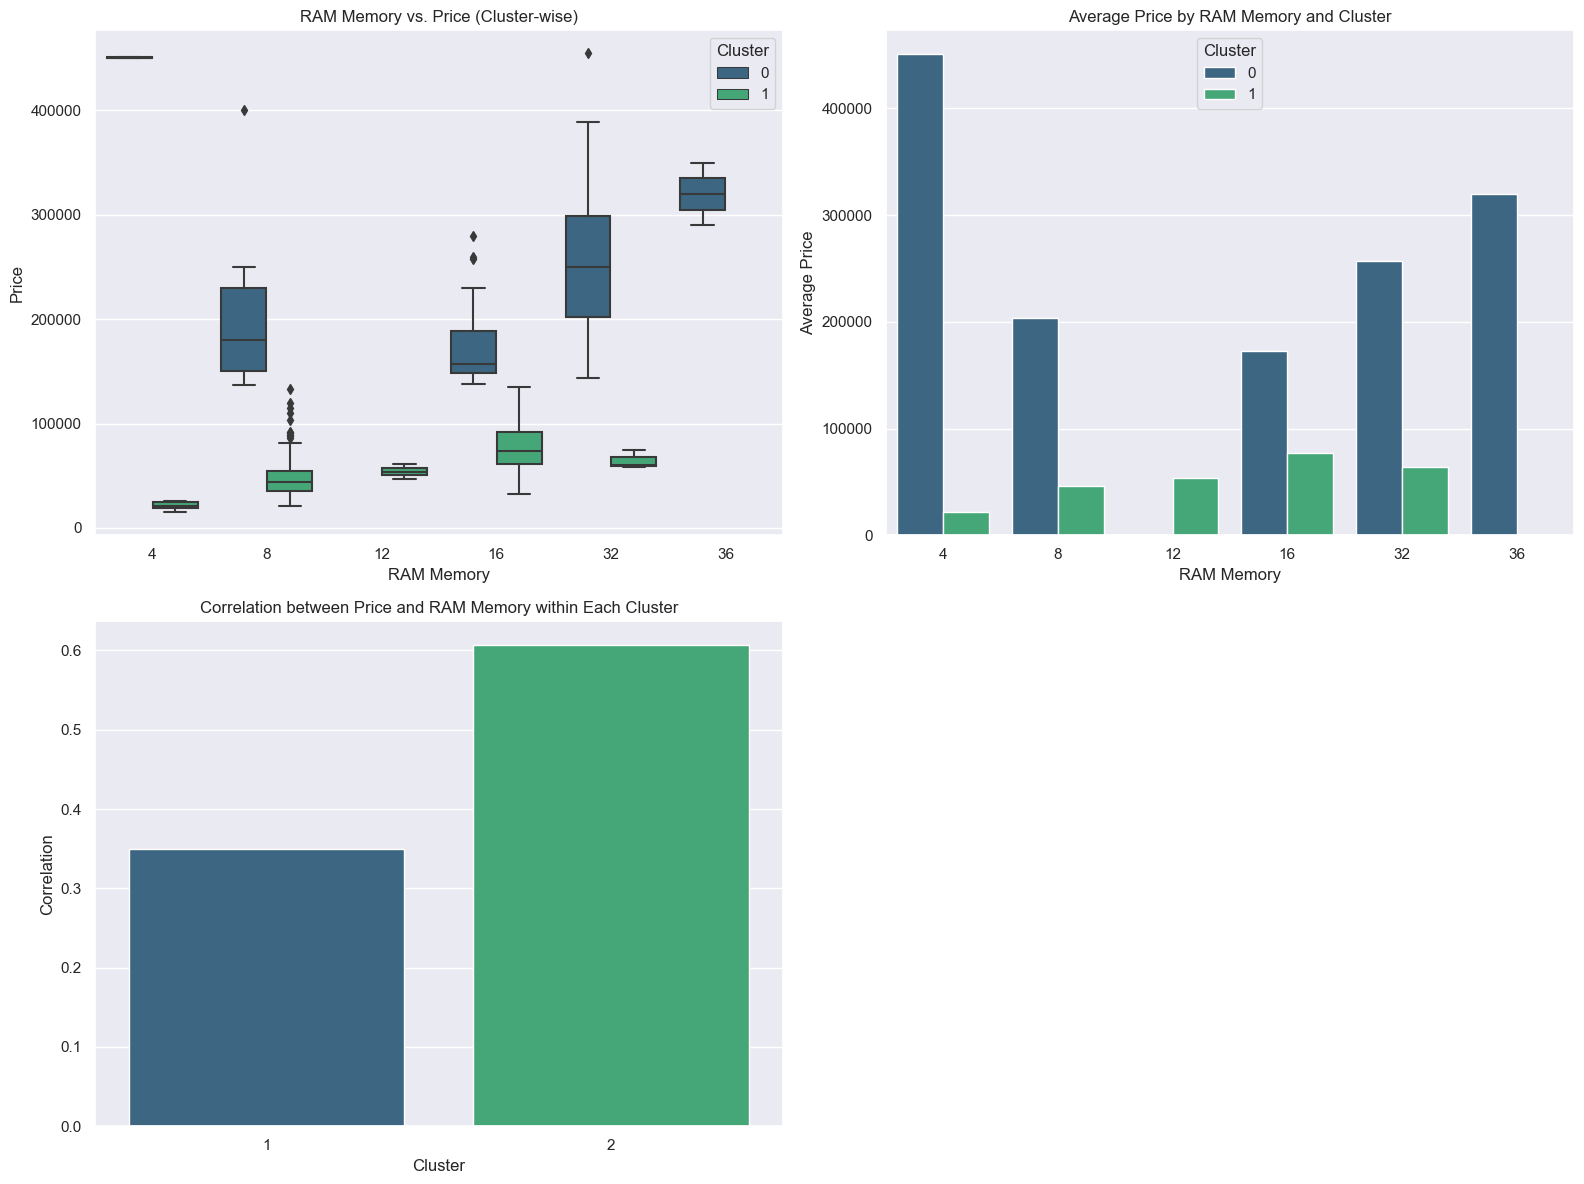

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Visualize the distribution of prices across RAM memory within each cluster
sns.boxplot(data=threeVarsNum, x='ram_memory', y='Price', hue='Cluster', palette='viridis', ax=axes[0, 0])
axes[0, 0].set_title('RAM Memory vs. Price (Cluster-wise)')
axes[0, 0].set_xlabel('RAM Memory')
axes[0, 0].set_ylabel('Price')
axes[0, 0].legend(title='Cluster')

# Calculate average price for each cluster and RAM memory level
cluster_price_stats_ram = threeVarsNum.groupby(['Cluster', 'ram_memory']).agg({'Price': 'mean'}).reset_index()

# Visualize average prices across different levels of RAM memory within each cluster
sns.barplot(data=cluster_price_stats_ram, x='ram_memory', y='Price', hue='Cluster', palette='viridis', ax=axes[0, 1])
axes[0, 1].set_title('Average Price by RAM Memory and Cluster')
axes[0, 1].set_xlabel('RAM Memory')
axes[0, 1].set_ylabel('Average Price')
axes[0, 1].legend(title='Cluster')

# Calculate correlations between price and RAM memory within each cluster
cluster_correlations_ram = []
for cluster in range(optimal_k):
    cluster_data = threeVarsNum[threeVarsNum['Cluster'] == cluster]
    correlation_ram = cluster_data[['Price', 'ram_memory']].corr().iloc[0, 1]
    cluster_correlations_ram.append(correlation_ram)

# Create a DataFrame to hold cluster correlations for RAM memory
cluster_corr_df_ram = pd.DataFrame({'Cluster': range(1, optimal_k + 1), 'Correlation': cluster_correlations_ram})

# Visualize correlations between price and RAM memory within each cluster
sns.barplot(data=cluster_corr_df_ram, x='Cluster', y='Correlation', palette='viridis', ax=axes[1, 0])
axes[1, 0].set_title('Correlation between Price and RAM Memory within Each Cluster')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Correlation')

# Hide the empty subplot
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()


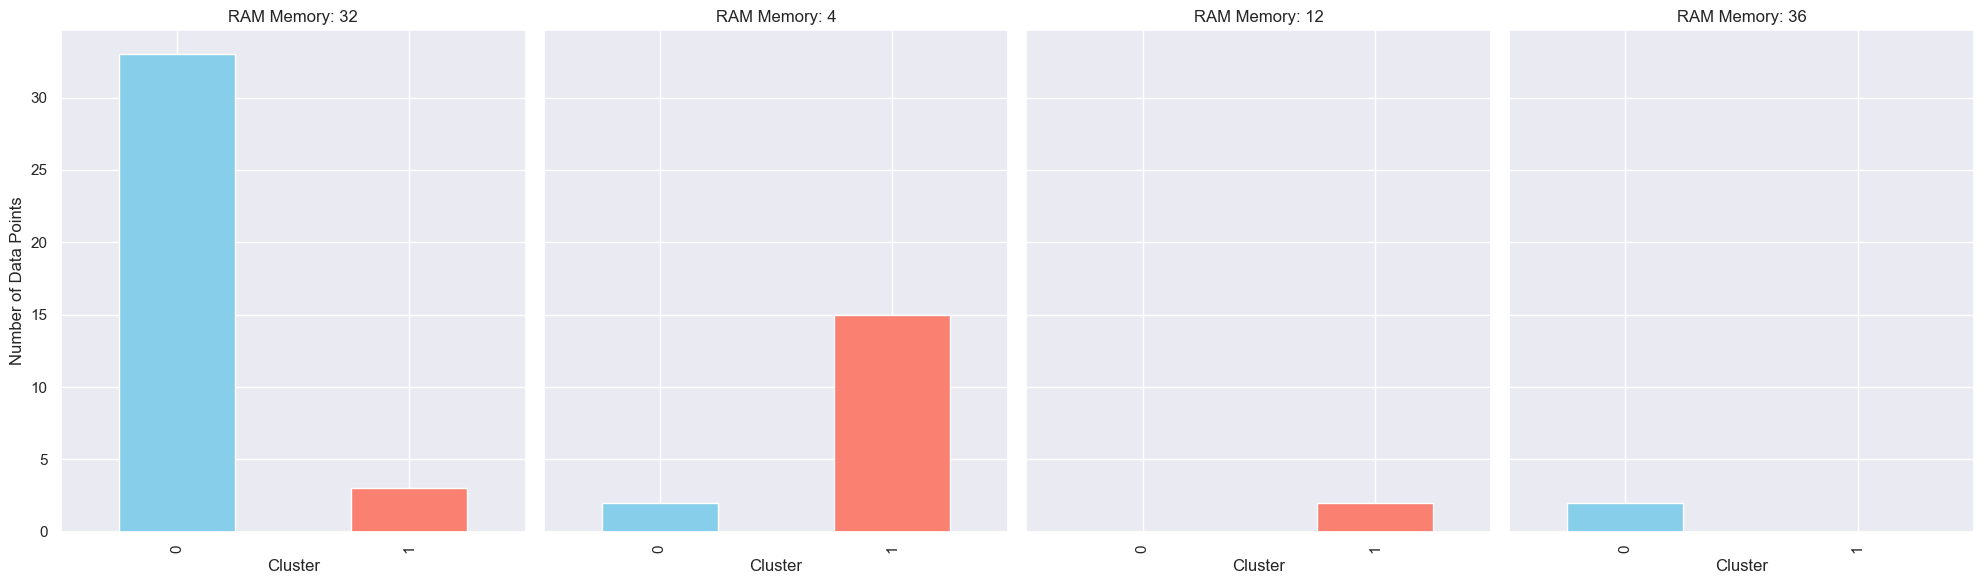

In [24]:
# Get unique RAM memory categories excluding 12, 4, 32, and 36
ram_categories = threeVarsNum['ram_memory'].unique()
ram_categories = ram_categories[np.isin(ram_categories, [12, 4, 32, 36])]

# Create subplots for each RAM memory category
fig, axes = plt.subplots(1, 4, figsize=(20, 6), sharey=True)

# Group the data by RAM memory and Cluster, then count the number of data points in each group
cluster_counts_by_ram = threeVarsNum.groupby(['ram_memory', 'Cluster']).size().unstack(fill_value=0)

# Iterate over each RAM memory category and plot the counts for cluster 0 and cluster 1
for i, ram_category in enumerate(ram_categories):
    cluster_counts = cluster_counts_by_ram.loc[ram_category]
    cluster_counts.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(f'RAM Memory: {ram_category}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Number of Data Points')

plt.tight_layout()
plt.show()



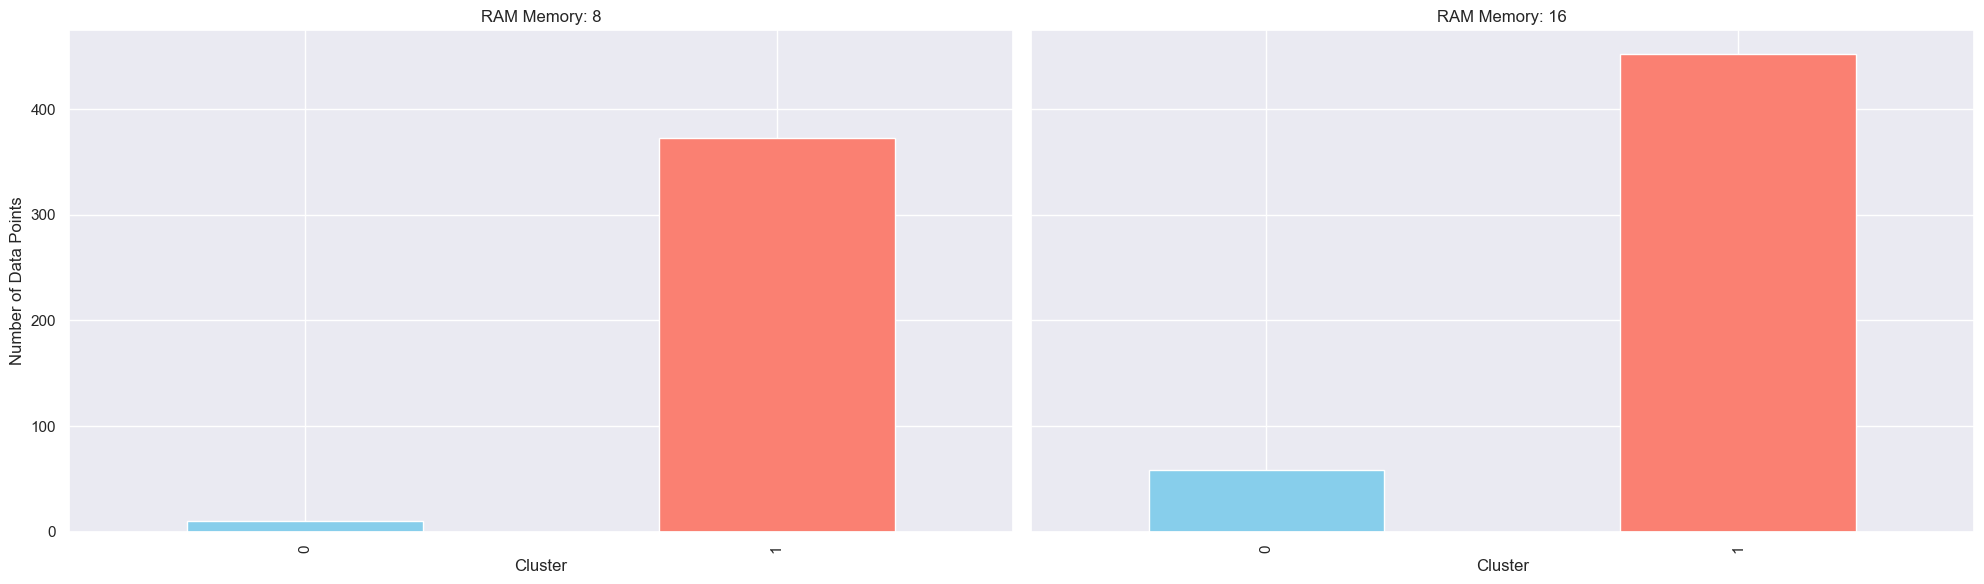

In [25]:
# Get unique RAM memory categories excluding 12, 4, 32, and 36
ram_categories = threeVarsNum['ram_memory'].unique()
ram_categories = ram_categories[~np.isin(ram_categories, [12, 4, 32, 36])]

# Create subplots for each RAM memory category
fig, axes = plt.subplots(1, 2, figsize=(20, 6), sharey=True)

# Iterate over each RAM memory category and plot the counts for cluster 0 and cluster 1
for i, ram_category in enumerate(ram_categories):
    cluster_counts = cluster_counts_by_ram.loc[ram_category]
    cluster_counts.plot(kind='bar', ax=axes[i], color=['skyblue', 'salmon'])
    axes[i].set_title(f'RAM Memory: {ram_category}')
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Number of Data Points')

plt.tight_layout()
plt.show()


In [26]:
# Count the number of data points in each cluster for each RAM memory
cluster_counts_by_ram = threeVarsNum.groupby(['ram_memory', 'Cluster']).size().unstack(fill_value=0)

# Display the cluster counts for each RAM memory
print(cluster_counts_by_ram)

Cluster      0    1
ram_memory         
4            2   15
8           10  373
12           0    2
16          58  452
32          33    3
36           2    0


In [27]:
# Count the total number of data points for each RAM memory category
total_counts_by_ram = cluster_counts_by_ram.sum(axis=1)

# Calculate the percentage of each category in each cluster against the total variables in each column
cluster_percentages = cluster_counts_by_ram.div(total_counts_by_ram, axis=0) * 100

# Display the percentage of each category in each cluster against the total variables in each column
print(cluster_percentages)



Cluster              0           1
ram_memory                        
4            11.764706   88.235294
8             2.610966   97.389034
12            0.000000  100.000000
16           11.372549   88.627451
32           91.666667    8.333333
36          100.000000    0.000000


As we can see here, in cluster 0, it consists mostly of laptops with 32GB and 36GB RAM memory, and the rest of it is mainly in cluster 1 based on the percentages shown above.

**So we can confidently support that ram_memory affects the price the most.**

The below code is to find out the number of processor_brand_apple in each cluster that will be used later on to assist in another problem statement question. It finds out the number of processor_brand_apple laptops in each cluster. Cluster 0 consisting of higher priced laptops compared to cluster 1.

C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


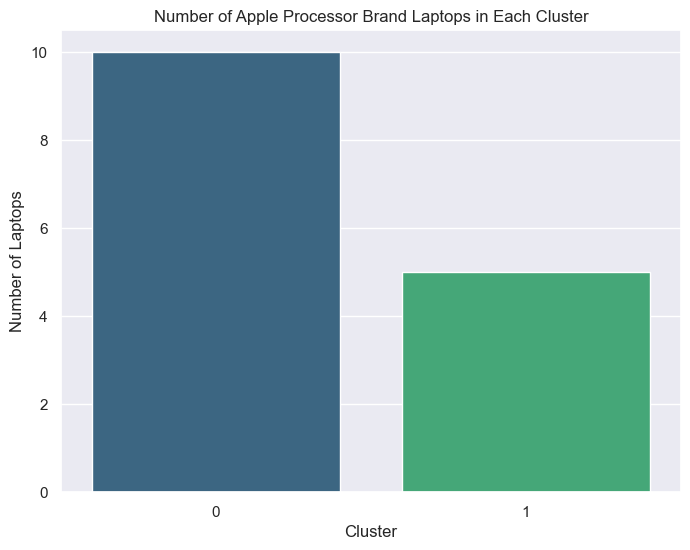

Total number of Apple laptops: 15
Number of Apple laptops in cluster 0: 10
Number of Apple laptops in cluster 1: 5


In [31]:
# Fit KMeans to the preprocessed data
kmeans.fit(threeVarsNum)

# Obtain cluster assignments for each data point
cluster_assignments = kmeans.labels_

# Add cluster assignments to the DataFrame
threeVarsNum['Cluster'] = cluster_assignments

# Filter the DataFrame to include only Apple processor brand laptops
apple_laptops = threeVarsNum[threeVarsNum['processor_brand_apple'] == 1]

# Count the number of Apple processor brand laptops in each cluster
apple_cluster_counts = apple_laptops['Cluster'].value_counts()

# Plot bar chart for the number of Apple processor brand laptops in each cluster
plt.figure(figsize=(8, 6))
sns.barplot(x=apple_cluster_counts.index, y=apple_cluster_counts.values, palette='viridis')
plt.title('Number of Apple Processor Brand Laptops in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Laptops')
plt.show()

# Number of Apple laptops in cluster 0
num_cluster_0_apple = apple_cluster_counts[0]

# Number of Apple laptops in cluster 1
num_cluster_1_apple = apple_cluster_counts[1]

# Total number of Apple laptops
total_apple_laptops = num_cluster_0_apple + num_cluster_1_apple

print("Total number of Apple laptops:", total_apple_laptops)
print("Number of Apple laptops in cluster 0:", num_cluster_0_apple)
print("Number of Apple laptops in cluster 1:", num_cluster_1_apple)
